In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns,warnings as w
w.simplefilter(action='ignore',category=FutureWarning)

In [2]:
df = pd.read_csv('airlines_flights_data.csv')

In [3]:
df = df.drop("index",axis=1)

In [4]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [23]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [28]:
def value_counts(df, col,clr=None):
    df[col].value_counts().plot(kind='barh', color=clr, edgecolor='black')
    plt.title(f"Value Counts of {col}", fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

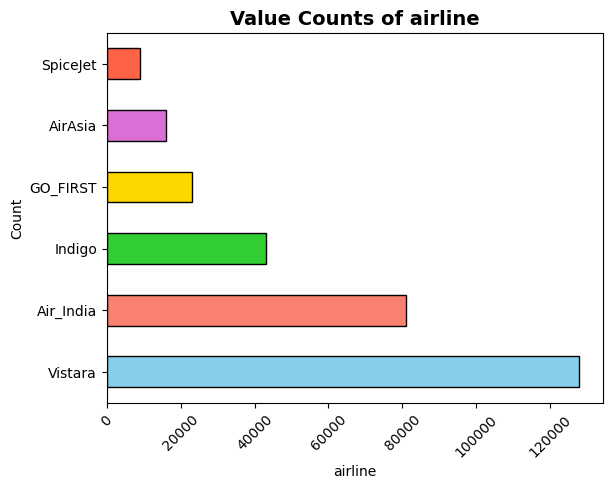

In [32]:
value_counts(df,'airline',["skyblue", "salmon", "limegreen", "gold", "orchid", "tomato"])

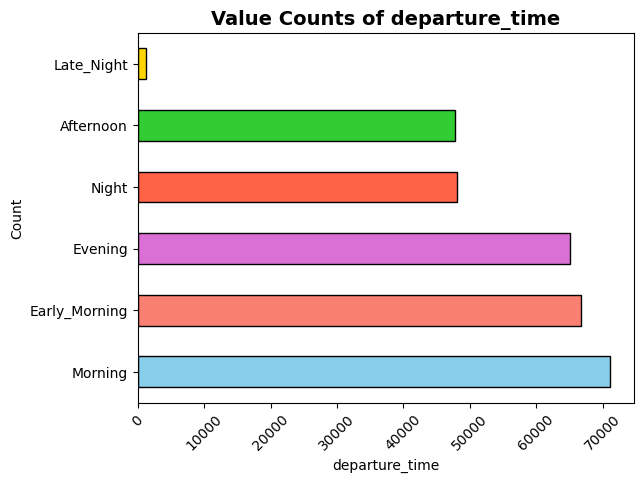

In [34]:
value_counts(df,'departure_time',["skyblue", "salmon", "orchid", "tomato", "limegreen", "gold"])

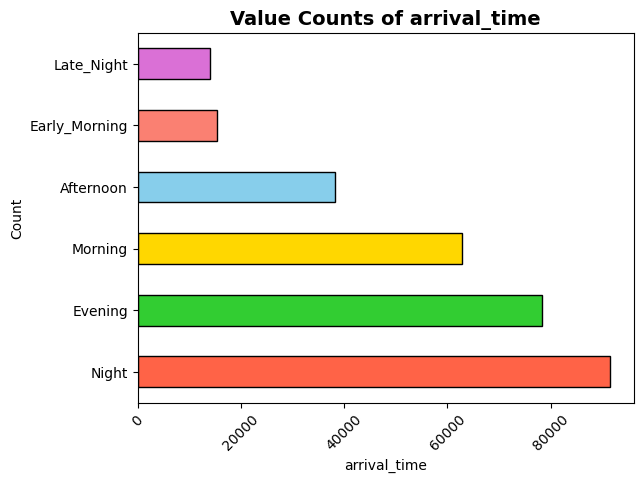

In [35]:
value_counts(df,'arrival_time',[ "tomato", "limegreen", "gold","skyblue", "salmon", "orchid"])

In [50]:
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

In [51]:
df.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [52]:
df.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

In [9]:
pd.crosstab(index=df['stops'],columns=df['class']).style.background_gradient(cmap='coolwarm')

class,Business,Economy
stops,,
one,84302,166561
two_or_more,1083,12203
zero,8102,27902


In [10]:
pd.crosstab(index=df['source_city'],columns=df['class']).style.background_gradient(cmap='coolwarm')

class,Business,Economy
source_city,,
Bangalore,16441,35620
Chennai,12529,26171
Delhi,18316,43027
Hyderabad,12870,27936
Kolkata,13473,32874
Mumbai,19858,41038


- Flight Class Distribution by Source City

- Flight Class Distribution by destination City

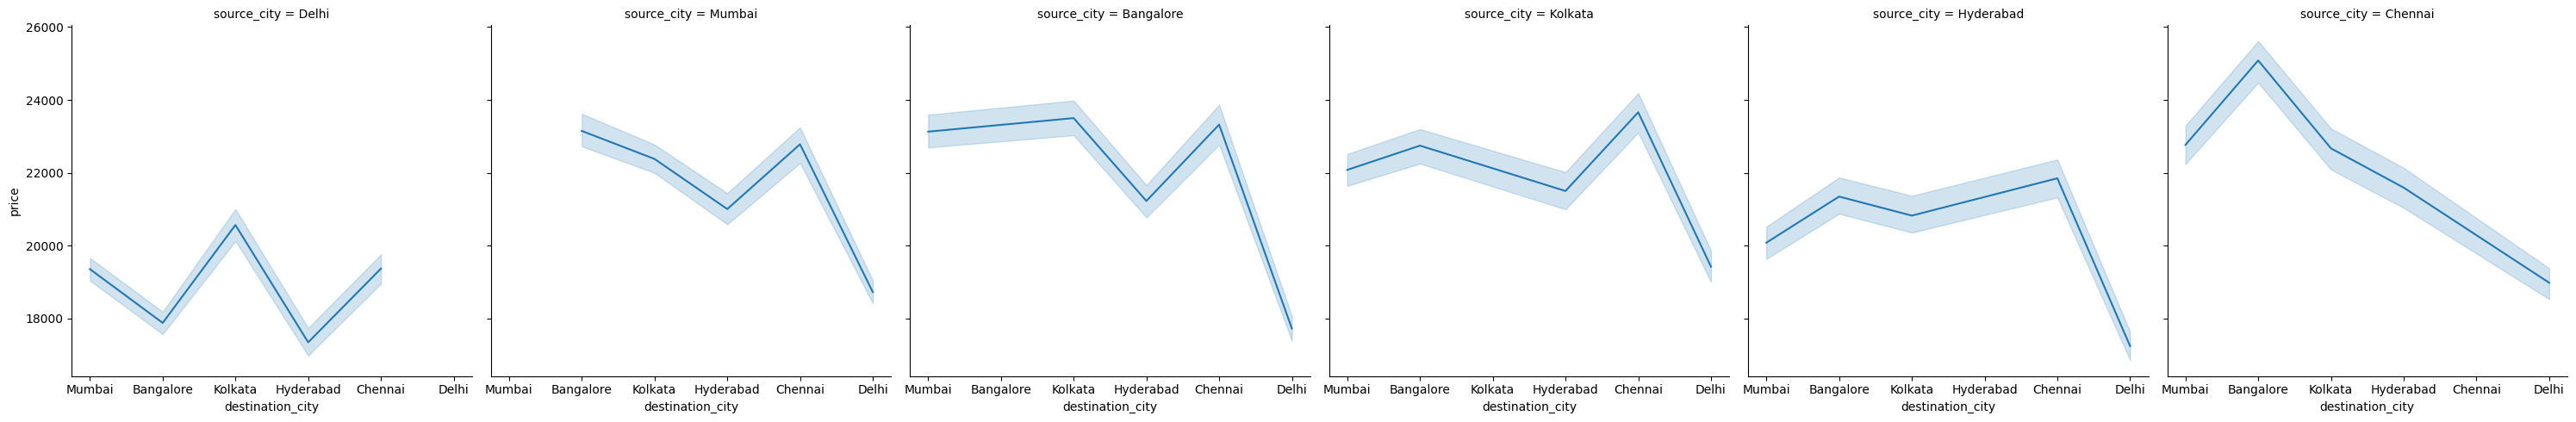

In [58]:
sns.relplot( x = 'destination_city', y = 'price', data = df, col = "source_city", kind = 'line')
plt.show()

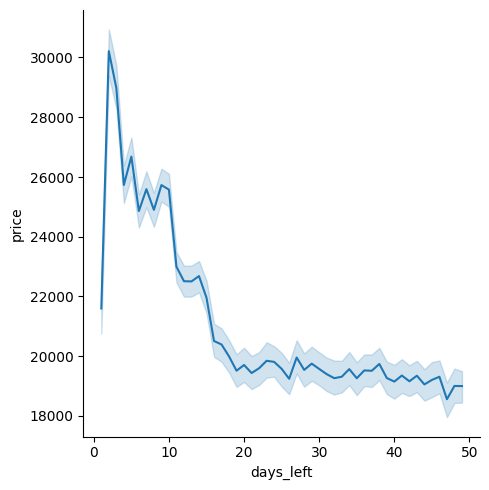

In [59]:
sns.relplot( y='price', x = 'days_left', kind = 'line', data = df )
plt.show()

In [62]:
df.groupby('class')['price'].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

In [11]:
avg_dp = (
    df.groupby(['airline','class', 'source_city', 'destination_city'])[['duration','price']]
    .mean()
    .reset_index()
)

In [12]:
avg_dp.sample(20)

,airline,class,source_city,destination_city,duration,price
162,SpiceJet,Economy,Delhi,Hyderabad,5.404276,5831.111842
3,AirAsia,Economy,Bangalore,Kolkata,7.557064,4443.468160
26,AirAsia,Economy,Mumbai,Chennai,9.593153,2909.364865
16,AirAsia,Economy,Hyderabad,Chennai,8.316081,2606.020270
230,Vistara,Economy,Kolkata,Hyderabad,17.035176,8471.994325
199,Vistara,Business,Kolkata,Delhi,12.043479,62403.943267
193,Vistara,Business,Hyderabad,Chennai,16.203978,51912.685286
214,Vistara,Economy,Chennai,Hyderabad,16.498237,7721.581308
125,Indigo,Economy,Chennai,Bangalore,2.785287,2845.482759
157,SpiceJet,Economy,Chennai,Hyderabad,7.027843,3291.725490


- Mean Flight Duration with Corresponding Prices Across Airlines and City Pairs

In [13]:
avg_dp[(avg_dp['source_city']=='Delhi')&(avg_dp['destination_city']=='Mumbai')]

,airline,class,source_city,destination_city,duration,price
14,AirAsia,Economy,Delhi,Mumbai,10.318877,3981.191456
44,Air_India,Business,Delhi,Mumbai,14.008484,41907.872651
74,Air_India,Economy,Delhi,Mumbai,13.346260,6996.975881
104,GO_FIRST,Economy,Delhi,Mumbai,6.598097,5762.211515
134,Indigo,Economy,Delhi,Mumbai,5.004710,4473.739130
164,SpiceJet,Economy,Delhi,Mumbai,8.172302,4628.251984
191,Vistara,Business,Delhi,Mumbai,10.221240,46384.870536
221,Vistara,Economy,Delhi,Mumbai,10.424477,6983.664617


In [14]:
def plot_flights(df, source_city, destination_city):
    subset = df[(df['source_city'] == source_city) & 
                (df['destination_city'] == destination_city)]
    
    if subset.empty:
        print(f"No flights found from {source_city} to {destination_city}")
        return
    
    # Create subplot with 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    # Plot average price
    sns.barplot(x='airline', y='price', data=subset, palette='viridis', ax=axes[0])
    axes[0].set_title(f"Average Price\n{source_city} → {destination_city}", fontsize=14, weight='bold')
    axes[0].set_ylabel("Price (INR)")
    axes[0].set_xlabel("Airline")
    axes[0].tick_params(axis='x', rotation=45)

    # Plot average duration
    sns.barplot(x='airline', y='duration', data=subset, palette='coolwarm', ax=axes[1])
    axes[1].set_title(f"Average Duration\n{source_city} → {destination_city}", fontsize=14, weight='bold')
    axes[1].set_ylabel("Duration (hours)")
    axes[1].set_xlabel("Airline")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

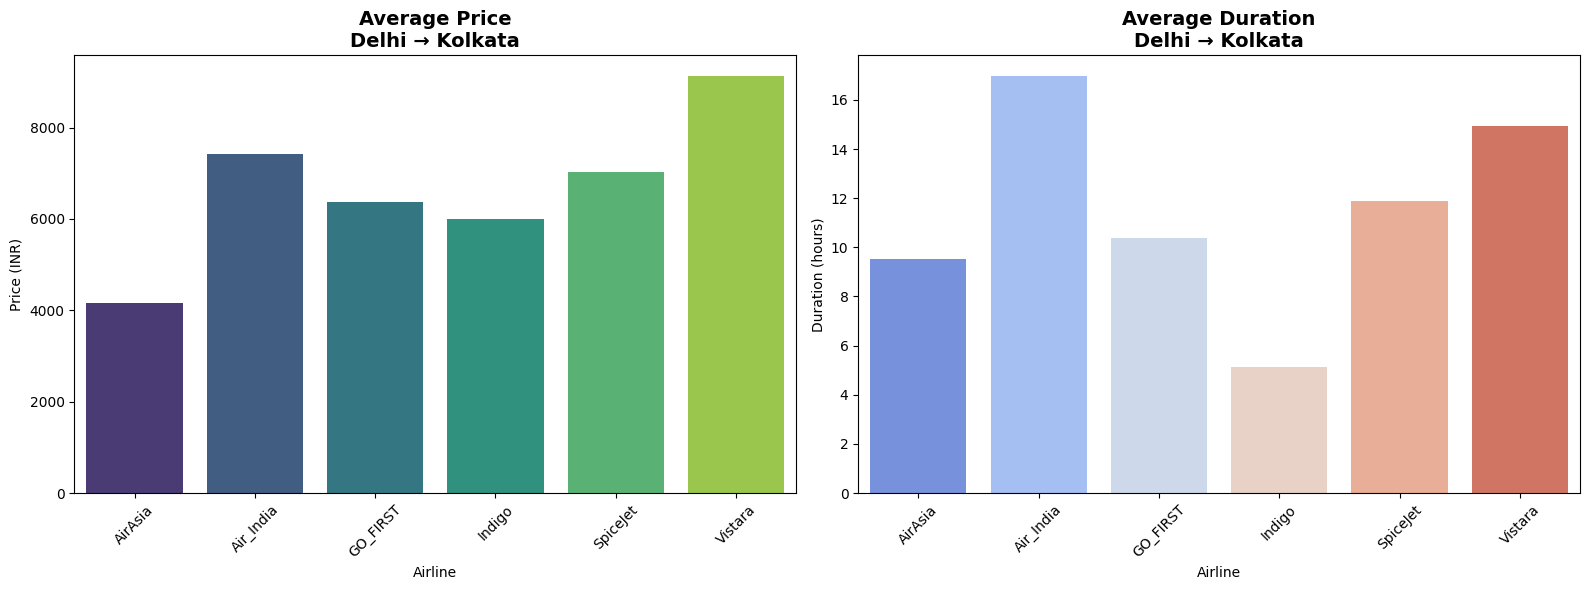

In [15]:
plot_flights(avg_dp[avg_dp['class']=='Economy'],"Delhi",'Kolkata')

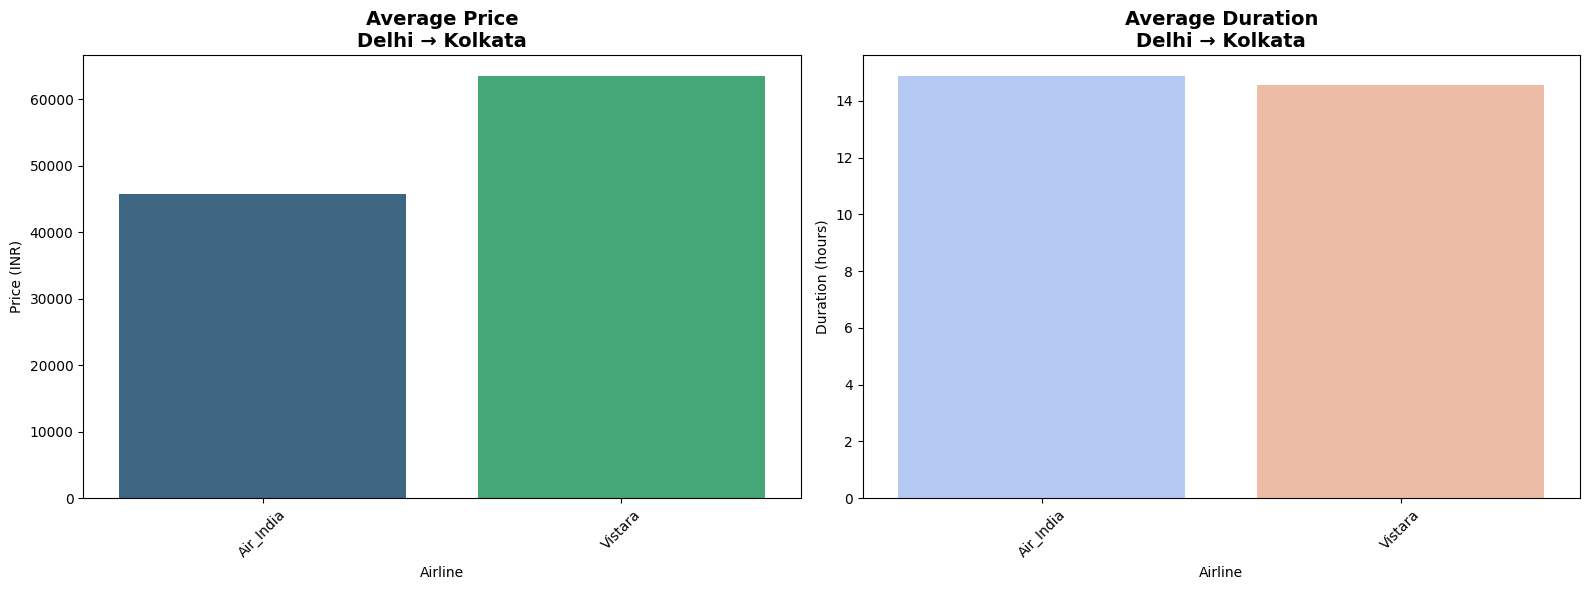

In [16]:
plot_flights(avg_dp[avg_dp['class']=='Business'],"Delhi",'Kolkata')

In [17]:
avg_dp.sort_values(by='price',ascending=False).head(10)

,airline,class,source_city,destination_city,duration,price
190,Vistara,Business,Delhi,Kolkata,14.569151,63469.766341
201,Vistara,Business,Kolkata,Mumbai,12.841880,62888.326139
206,Vistara,Business,Mumbai,Kolkata,13.414745,62525.265255
199,Vistara,Business,Kolkata,Delhi,12.043479,62403.943267
181,Vistara,Business,Bangalore,Mumbai,11.215508,61452.101869
202,Vistara,Business,Mumbai,Bangalore,10.946156,61209.568541
186,Vistara,Business,Chennai,Mumbai,11.768675,61109.317047
180,Vistara,Business,Bangalore,Kolkata,16.241772,60025.829430
203,Vistara,Business,Mumbai,Chennai,13.609706,59872.629017
197,Vistara,Business,Kolkata,Bangalore,16.611333,59685.605388


In [18]:
avg_dp.sort_values(by='price',ascending=True).head(10)

,airline,class,source_city,destination_city,duration,price
97,GO_FIRST,Economy,Chennai,Hyderabad,1.383684,1613.105263
5,AirAsia,Economy,Chennai,Bangalore,1.175435,1914.760870
106,GO_FIRST,Economy,Hyderabad,Chennai,1.421579,1942.263158
7,AirAsia,Economy,Chennai,Hyderabad,6.801825,2053.182540
0,AirAsia,Economy,Bangalore,Chennai,1.040000,2073.043478
120,Indigo,Economy,Bangalore,Chennai,1.039078,2363.326241
155,SpiceJet,Economy,Chennai,Bangalore,1.330000,2426.309091
16,AirAsia,Economy,Hyderabad,Chennai,8.316081,2606.020270
150,SpiceJet,Economy,Bangalore,Chennai,1.080000,2613.310345
9,AirAsia,Economy,Chennai,Mumbai,8.745227,2691.100000
